In [1]:
from typing import *
from functools import reduce
import glob
import os
import nltk
import numpy as np
import pandas as pd
from spacy.pipeline import EntityRecognizer

from os import path
from PIL import Image
from wordcloud import WordCloud, ImageColorGenerator

import matplotlib.pyplot as plt
import string
from nltk.corpus import stopwords

import spacy

nlp = spacy.load("en_core_web_sm")
ner = EntityRecognizer(nlp.vocab)

# Download if error
#nltk.download()
STOPWORDS = stopwords.words('english')


In [15]:
class Document:
    def __init__(self, name, text= ""):
        self.name = name
        self.text = text
    
    def __repr__(self):
        return f'Document -> {self.name}'

    def __str__(self):
        return self.text

    def __dict__(self):
        return { "name": name, "text": text }

def get_documents(duc_type: str) -> List[Document]:
    paths = glob.glob(f'data/{duc_type}/**/*.txt')
    documents = []
    for path in paths:
        with open(path, 'r') as file:
            filename = os.path.basename(path)
            content = file.read()
            documents.append(Document(filename, content))

    return documents

def get_plain_text_from_documents(documents: List[Document]) -> str:
    
    plain_text = reduce((lambda doc1, doc2: f'{str(doc1)} {str(doc2)}'), documents)

    return plain_text

def preprocessing(tokens: List[str]) -> List[str]:
    return [token.lower() for token in tokens if token not in string.punctuation and not token.isdigit() and token not in [*STOPWORDS, "'s", "'S", "-", "``", "--", "''"]]

def percentage(count, total):
    return 100 * count / total


def print_most_common_words(words: List[Tuple[str, str]], total_count: int):
    print(f"Total of words: {total_count}")
    for index, (word, count) in enumerate(words):
        perc = percentage(count, total_count)
        print(f'{index + 1}°- "{word}" with {count} appearings and represents {perc:.2f}% of total')


def print_most_common_ents(ents: List[Tuple[str, str]], ent_type):
    print(f'Most Common {ent_type}')

    for index, (ent, count) in enumerate(ents):
        print(f'{index + 1}°- "{ent}" with {count} appearings')
 



# Insights retirados para cada 

- Wordcloud das palavras
- 5 palavras mais comuns por porcentagem
- 5 Nomes pessoais mais citados
- 5 Locais mais citados
- 5 Organizações mais citadas

### Initializing variables

In [3]:

duc_1_docs = get_documents('DUC 2001')
duc_2_docs = get_documents('DUC 2002')

duc_1_text = get_plain_text_from_documents(duc_1_docs)
duc_2_text = get_plain_text_from_documents(duc_2_docs)

duc_1_tokens = nltk.word_tokenize(duc_1_text)
duc_2_tokens = nltk.word_tokenize(duc_2_text)

duc_1_vocab = set(duc_1_tokens)
duc_2_vocab = set(duc_2_tokens)


###  Estructure data in a DataFrame

In [4]:
ducs_df = pd.DataFrame([[duc_1_tokens], [duc_2_tokens]], columns=["tokens"], index=["DUC_2001", "DUC_2002"])

print("After preprocess...\n")

ducs_df["tokens"] = ducs_df["tokens"].apply(preprocessing)
ducs_df.head()



After preprocess...



,tokens
DUC_2001,"[gandhi, slaying, ignites, turmoil, military, ..."
DUC_2002,"[quayle, biography, inflates, state, job, quay..."


## Wordclouds

### DUC 2001 wordcloud

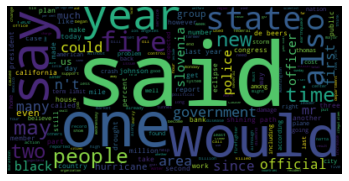

In [5]:
duc1 = " ".join(ducs_df.loc["DUC_2001"]["tokens"])
wc_duc1 = WordCloud(stopwords=STOPWORDS).generate(duc1)

plt.imshow(wc_duc1, interpolation='bilinear')
plt.axis("off")
plt.show()



### DUC 2002 wordcloud

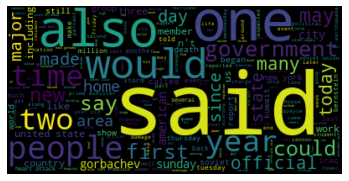

In [6]:
duc2 = " ".join(ducs_df.loc["DUC_2002"]["tokens"])

wc_duc2 = WordCloud(stopwords=STOPWORDS).generate(duc2)

plt.imshow(wc_duc2, interpolation='bilinear')
plt.axis("off")
plt.show()


## 5 Palavras mais comuns para cada ds e suas porcentagens em relação ao total

### Adding a len property to dataframe

In [7]:
total_len_1 = len(ducs_df.loc["DUC_2001"]["tokens"])
total_len_2 = len(ducs_df.loc["DUC_2002"]["tokens"])

ducs_df["len"] = [total_len_1, total_len_2]

ducs_df.head()


,tokens,len
DUC_2001,"[gandhi, slaying, ignites, turmoil, military, ...",187739
DUC_2002,"[quayle, biography, inflates, state, job, quay...",258067


### DUC 2001 common words (without stopwords)

In [8]:
mc_duc1 = Counter(ducs_df.loc["DUC_2001"]["tokens"]).most_common(10)

print_most_common_words(mc_duc1, ducs_df.loc["DUC_2001"]["len"])

Total of words: 187739
1°- "the" with 2628 appearings and represents 1.40% of total
2°- "said" with 2181 appearings and represents 1.16% of total
3°- "would" with 758 appearings and represents 0.40% of total
4°- "one" with 704 appearings and represents 0.37% of total
5°- "people" with 673 appearings and represents 0.36% of total
6°- "in" with 628 appearings and represents 0.33% of total
7°- "i" with 585 appearings and represents 0.31% of total
8°- "year" with 570 appearings and represents 0.30% of total
9°- "police" with 544 appearings and represents 0.29% of total
10°- "new" with 535 appearings and represents 0.28% of total


### DUC 2002 common words (without stopwords)

In [9]:
mc_duc2 = Counter(ducs_df.loc["DUC_2002"]["tokens"]).most_common(10)



print_most_common_words(mc_duc2, ducs_df.loc["DUC_2002"]["len"])

Total of words: 258067
1°- "the" with 3945 appearings and represents 1.53% of total
2°- "said" with 3896 appearings and represents 1.51% of total
3°- "people" with 1216 appearings and represents 0.47% of total
4°- "i" with 1044 appearings and represents 0.40% of total
5°- "one" with 936 appearings and represents 0.36% of total
6°- "would" with 818 appearings and represents 0.32% of total
7°- "two" with 793 appearings and represents 0.31% of total
8°- "in" with 730 appearings and represents 0.28% of total
9°- "it" with 724 appearings and represents 0.28% of total
10°- "he" with 718 appearings and represents 0.28% of total


### Adding column top 10 common

In [10]:
ducs_df["top10_words"] = [mc_duc1, mc_duc2]

ducs_df.head()

,tokens,len,top10_words
DUC_2001,"[gandhi, slaying, ignites, turmoil, military, ...",187739,"[(the, 2628), (said, 2181), (would, 758), (one..."
DUC_2002,"[quayle, biography, inflates, state, job, quay...",258067,"[(the, 3945), (said, 3896), (people, 1216), (i..."


## Prepare for last insights (get persons, localizations and organizations using spacy NER)

In [23]:
ducs_df["text"] = [duc_1_text, duc_2_text]



def get_persons_locs_orgs(documents: List[Document]):
    persons = []
    locs = []
    orgs = []
    for doc in documents:
        processed = nlp(doc.text)
        for ent in processed.ents:
            if ent.label_ == "PERSON":
                persons.append(ent.text)
            elif ent.label_ == "ORG":
                orgs.append(ent.text)
            elif ent.label_ == "LOC":
                locs.append(ent.text)

    return persons, locs, orgs

duc_1_persons, duc_1_locs, duc_1_orgs = get_persons_locs_orgs(duc_1_docs)
duc_2_persons, duc_2_locs, duc_2_orgs = get_persons_locs_orgs(duc_2_docs)

    

## Top 10 persons (DUC 2001)

In [46]:
top_10_persons1 = Counter(duc_1_persons).most_common(10)

print_most_common_ents(top_10_persons1, "PERSONS")

Most Common PERSONS
1°- "Johnson" with 224 appearings
2°- "Thomas" with 183 appearings
3°- "Taylor" with 92 appearings
4°- "Bush" with 66 appearings
5°- "Clinton" with 63 appearings
6°- "Jackson" with 61 appearings
7°- "Lewis" with 46 appearings
8°- "Reagan" with 42 appearings
9°- "Guzman" with 41 appearings
10°- "Clarence Thomas" with 41 appearings


## Top 10 Persons (DUC 2002)

In [47]:
top_10_persons2 = Counter(duc_2_persons).most_common(10)

print_most_common_ents(top_10_persons2, "PERSONS")

Most Common PERSONS
1°- "Gorbachev" with 348 appearings
2°- "Bush" with 328 appearings
3°- "Thatcher" with 197 appearings
4°- "Bernstein" with 193 appearings
5°- "Lennon" with 189 appearings
6°- "Honecker" with 162 appearings
7°- "Sakharov" with 145 appearings
8°- "Quayle" with 143 appearings
9°- "Mandela" with 129 appearings
10°- "Hirohito" with 113 appearings


### Add to dataframe

In [48]:

ducs_df["top_10_persons"] = [top_10_persons1, top_10_persons2]
ducs_df.head()

,tokens,len,top10_words,text,top_10_persons,top_10_locs,top_10_orgs
DUC_2001,"[gandhi, slaying, ignites, turmoil, military, ...",187739,"[(the, 2628), (said, 2181), (would, 758), (one...",GANDHI'S SLAYING IGNITES TURMOIL MILITARY PLAC...,"[(Johnson, 224), (Thomas, 183), (Taylor, 92), ...","[(Atlantic, 56), (Europe, 53), (Caribbean, 49)...","[(Congress, 190), (Exxon, 164), (House, 134), ..."
DUC_2002,"[quayle, biography, inflates, state, job, quay...",258067,"[(the, 3945), (said, 3896), (people, 1216), (i...",Quayle's Biography Inflates State Job; Quayle ...,"[(Gorbachev, 348), (Bush, 328), (Thatcher, 197...","[(Kashmir, 107), (Europe, 98), (Earth, 73), (C...","[(Navy, 100), (Maxwell, 93), (Senate, 90), (Mc..."


## Top 10 Locations DUC 2001

In [49]:
top_10_locs1 = Counter(duc_1_locs).most_common(10)

print_most_common_ents(top_10_locs1, "LOCATIONS")

Most Common LOCATIONS
1°- "Atlantic" with 56 appearings
2°- "Europe" with 53 appearings
3°- "Caribbean" with 49 appearings
4°- "Africa" with 42 appearings
5°- "Prince William Sound" with 34 appearings
6°- "Midwest" with 24 appearings
7°- "West" with 17 appearings
8°- "Asia" with 16 appearings
9°- "Earth" with 15 appearings
10°- "the Gulf of Mexico" with 15 appearings


## Top 10 Locations DUC 2002

In [50]:
top_10_locs2 = Counter(duc_2_locs).most_common(10)

print_most_common_ents(top_10_locs2, "LOCATIONS")


Most Common LOCATIONS
1°- "Kashmir" with 107 appearings
2°- "Europe" with 98 appearings
3°- "Earth" with 73 appearings
4°- "Caribbean" with 50 appearings
5°- "the Ohio River" with 33 appearings
6°- "the Persian Gulf" with 30 appearings
7°- "West" with 26 appearings
8°- "the Gulf of Mexico" with 17 appearings
9°- "the Yucatan Peninsula" with 16 appearings
10°- "Midwest" with 15 appearings


### Add to dataframe

In [51]:

ducs_df["top_10_locs"] = [top_10_locs1, top_10_locs2]
ducs_df.head()

,tokens,len,top10_words,text,top_10_persons,top_10_locs,top_10_orgs
DUC_2001,"[gandhi, slaying, ignites, turmoil, military, ...",187739,"[(the, 2628), (said, 2181), (would, 758), (one...",GANDHI'S SLAYING IGNITES TURMOIL MILITARY PLAC...,"[(Johnson, 224), (Thomas, 183), (Taylor, 92), ...","[(Atlantic, 56), (Europe, 53), (Caribbean, 49)...","[(Congress, 190), (Exxon, 164), (House, 134), ..."
DUC_2002,"[quayle, biography, inflates, state, job, quay...",258067,"[(the, 3945), (said, 3896), (people, 1216), (i...",Quayle's Biography Inflates State Job; Quayle ...,"[(Gorbachev, 348), (Bush, 328), (Thatcher, 197...","[(Kashmir, 107), (Europe, 98), (Earth, 73), (C...","[(Navy, 100), (Maxwell, 93), (Senate, 90), (Mc..."


## Top 10 Organizations DUC 2001

In [52]:
top_10_orgs1 = Counter(duc_1_orgs).most_common(10)

print_most_common_ents(top_10_orgs1, "ORGANIZATIONS")

Most Common ORGANIZATIONS
1°- "Congress" with 190 appearings
2°- "Exxon" with 164 appearings
3°- "House" with 134 appearings
4°- "TB" with 122 appearings
5°- "De Beers" with 105 appearings
6°- "Senate" with 101 appearings
7°- "NRA" with 96 appearings
8°- "CSO" with 43 appearings
9°- "Nafta" with 38 appearings
10°- "De Beers'" with 35 appearings


## Top 10 Oganizations DUC 2002

In [53]:
top_10_orgs2 = Counter(duc_2_orgs).most_common(10)

print_most_common_ents(top_10_orgs2, "ORGANIZATIONS")


Most Common ORGANIZATIONS
1°- "Navy" with 100 appearings
2°- "Maxwell" with 93 appearings
3°- "Senate" with 90 appearings
4°- "McDonald's" with 79 appearings
5°- "Tower" with 79 appearings
6°- "Tass" with 66 appearings
7°- "Communist Party" with 52 appearings
8°- "Pentagon" with 51 appearings
9°- "U.N." with 50 appearings
10°- "Walton" with 50 appearings


### Add to dataframe

In [54]:
ducs_df["top_10_orgs"] = [top_10_orgs1, top_10_orgs2]
ducs_df.head()

,tokens,len,top10_words,text,top_10_persons,top_10_locs,top_10_orgs
DUC_2001,"[gandhi, slaying, ignites, turmoil, military, ...",187739,"[(the, 2628), (said, 2181), (would, 758), (one...",GANDHI'S SLAYING IGNITES TURMOIL MILITARY PLAC...,"[(Johnson, 224), (Thomas, 183), (Taylor, 92), ...","[(Atlantic, 56), (Europe, 53), (Caribbean, 49)...","[(Congress, 190), (Exxon, 164), (House, 134), ..."
DUC_2002,"[quayle, biography, inflates, state, job, quay...",258067,"[(the, 3945), (said, 3896), (people, 1216), (i...",Quayle's Biography Inflates State Job; Quayle ...,"[(Gorbachev, 348), (Bush, 328), (Thatcher, 197...","[(Kashmir, 107), (Europe, 98), (Earth, 73), (C...","[(Navy, 100), (Maxwell, 93), (Senate, 90), (Mc..."


## Final Dataframe
### Put into a file

In [55]:
ducs_df.to_pickle("./ducs_dataframe.pkl")